2022/07/26
머신러닝 기본

In [1]:
### 한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

Unknown System


In [3]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 5.0 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=ef39d4d966fe72e5a7c26443af0be816eb5b51e97502f09bac490ecef6815ccc
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [4]:
import mglearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

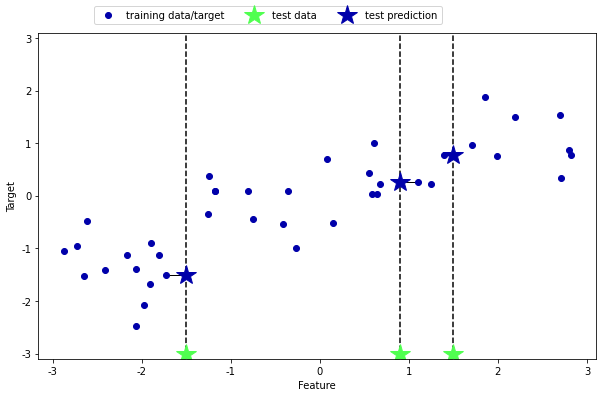

In [5]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

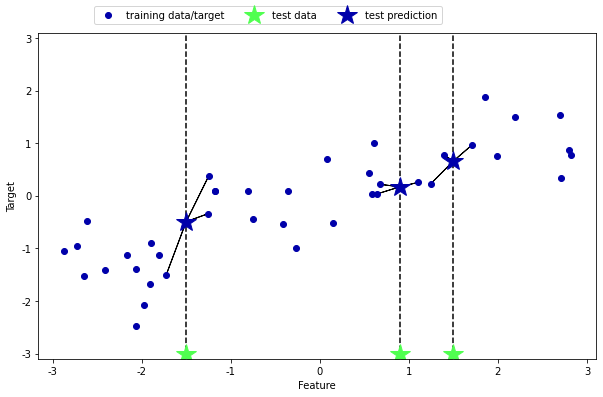

In [6]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [8]:
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                             random_state=0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50883 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_te

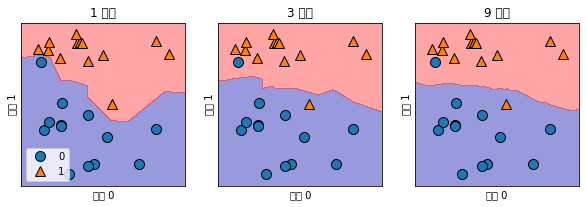

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit 메소드는 self 오브젝트를 리턴합니다
    # 그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있습니다
    model = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(model, X, 
                                    fill=True, eps=0.5, ax=ax, alpha=.4)
    
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)

In [10]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

In [11]:
cancer = load_breast_cancer()
print("cancer.keys() : \n{}".format(cancer.keys()))
print("유방암 데이터의 행열 : {}".format(cancer.data.shape))

cancer.keys() : 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
유방암 데이터의 행열 : (569, 30)


In [12]:
print("특성이름(featuer_names) : {}".format(cancer['feature_names']))
print("유방암 데이터의 형태 : ", cancer.data.shape)
print()
print("클래스 이름(target_names) : {}".format(cancer['target_names']))
print("클래스별 샘플 개수 : \n",np.bincount(cancer.target))

특성이름(featuer_names) : ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
유방암 데이터의 형태 :  (569, 30)

클래스 이름(target_names) : ['malignant' 'benign']
클래스별 샘플 개수 : 
 [212 357]


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                      stratify=cancer.target,
                                      random_state=77)

In [15]:
print( len(y_train) )
y_1_all = (y == 1).sum() 
y_0_all =  (y == 0).sum() 

print(f"target y의 \n 0의 개수 : {y_0_all} \n 1의 개수 : {y_1_all}")

426
target y의 
 0의 개수 : 212 
 1의 개수 : 357


In [16]:
y_train_1 = (y_train == 1).sum()
y_test_1 = (y_test == 1).sum()

y_train_0 = len(y_train) - (y_train == 1).sum()
y_test_0 = len(y_test) - (y_test == 1).sum()

print("데이터 셋의 target(학습:테스트)의 비율 - 1에 대해서")
print(f"train비율 : {y_train_1/y_1_all}, test비율 : {y_test_1/y_1_all}")

print("데이터 셋의 target(학습:테스트)의 비율 - 0에 대해서")
print(f"train비율 : {y_train_0/y_0_all}, test비율 : {y_test_0/y_0_all}")

데이터 셋의 target(학습:테스트)의 비율 - 1에 대해서
train비율 : 0.7478991596638656, test비율 : 0.25210084033613445
데이터 셋의 target(학습:테스트)의 비율 - 0에 대해서
train비율 : 0.75, test비율 : 0.25


In [17]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)  # 모델 선택
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1])

In [18]:
(pred == y_test).sum() / (len(pred)) * 100

90.9090909090909

In [19]:
acc_tr = model.score(X_train, y_train)   # 정확도(학습용 데이터)
acc_test = model.score(X_test, y_test)   # 정확도(테스트 데이터)
acc_tr, acc_test

(0.9553990610328639, 0.9090909090909091)

In [20]:
k_list = []
tr_acc = []
test_acc = []
k_nums = range(1, 22, 2)# 1,3,5~21

for n in k_nums:
    # 모델 선택 및 학습 
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(X_train, y_train)
    
    # 정확도 구하기 
    acc_tr = model.score(X_train, y_train)
    acc_test = model.score(X_test, y_test)
    
    # 정확도 값 저장.
    k_list.append(n)
    tr_acc.append(acc_tr)
    test_acc.append(acc_test)
    
    print("k : ", n)
    print("학습용셋 정확도 {:.3f}".format(acc_tr) )
    print("테스트용셋 정확도 {:.3f}".format(acc_test) )

k :  1
학습용셋 정확도 1.000
테스트용셋 정확도 0.888
k :  3
학습용셋 정확도 0.955
테스트용셋 정확도 0.909
k :  5
학습용셋 정확도 0.953
테스트용셋 정확도 0.916
k :  7
학습용셋 정확도 0.953
테스트용셋 정확도 0.909
k :  9
학습용셋 정확도 0.946
테스트용셋 정확도 0.909
k :  11
학습용셋 정확도 0.939
테스트용셋 정확도 0.909
k :  13
학습용셋 정확도 0.937
테스트용셋 정확도 0.916
k :  15
학습용셋 정확도 0.939
테스트용셋 정확도 0.916
k :  17
학습용셋 정확도 0.934
테스트용셋 정확도 0.923
k :  19
학습용셋 정확도 0.937
테스트용셋 정확도 0.923
k :  21
학습용셋 정확도 0.934
테스트용셋 정확도 0.923


In [21]:
# tr_acc = []
# test_acc = []
dat = { "tr_acc":tr_acc, "test_acc":test_acc }
data_df = pd.DataFrame(dat, index=k_list)
data_df

,tr_acc,test_acc
1,1.000000,0.888112
3,0.955399,0.909091
5,0.953052,0.916084
7,0.953052,0.909091
9,0.946009,0.909091
11,0.938967,0.909091
13,0.936620,0.916084
15,0.938967,0.916084
17,0.934272,0.923077
19,0.936620,0.923077


0.11.2


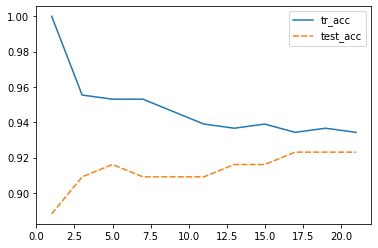

In [22]:
import seaborn as sns
print(sns.__version__)

sns.lineplot(data=data_df, palette="tab10")
plt.show()

3-2 k을 1부터 100까지 돌려보고 가장 높은 값을 갖는 k의 값을 구해보자.(댓글 확인- 정확도(학습용, 테스트용)

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
print("numpy 버전 : ", np.__version__)
print("matplotlib 버전 : ", matplotlib.__version__)

numpy 버전 :  1.21.6
matplotlib 버전 :  3.2.2


In [24]:
# 설치가 안되어 있을 경우, 설치 필요.
import mglearn
import sklearn
print("sklearn 버전 : ",  sklearn.__version__)
print("mglearn 버전 : ",  mglearn.__version__)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

sklearn 버전 :  1.0.2
mglearn 버전 :  0.1.9


* 회귀모델
      A. 예측하려는 값이 수치형일 때 사용되는 모델
      B. MSE(mean squared error) 최소화 시키는 회귀 계수를 찾는다. 회귀계수(w1, w2, ... b)
      C. 선형회귀 (Linear Regression)
      D. 선형함수로 표현되는데 w와 b가 모델 파라미터가 된다.
      E. 특성이 하나일 때 직선 표현, 특성이 두 개일 때
         y = w1 * x1 + b 직선
         y = w1 * x1 + w2 * x2 + 2 -> 평면
         y = w1 * x1 + w2 * x2 + ... + b -> 초평면

3-5 train_test_split를 이용해서 데이터 나눠보기(댓글 코드 올리기)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

3-6 (추가 실습) 학습용 70%, 테스트용 30%로 나눠보기

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                           test_size=0.3)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
model = LinearRegression()
model.fit(X_train, y_train)

# 학습 완료 후, 예측
pred = model.predict(X_test)
pred

array([-1.44595025e-01,  3.06951499e-01,  6.11770241e-01,  6.53190654e-01,
        9.89102341e-01,  8.33387728e-01, -3.26714869e-02,  1.04787766e+00,
        1.28165970e+00,  2.97951495e-01,  8.60845578e-01,  8.13720227e-01,
        6.81511139e-01,  8.65016496e-01, -1.36028044e-01,  1.03766096e+00,
        8.21419425e-01,  8.40733055e-01, -1.38062116e-01,  1.13732344e+00,
       -8.61855511e-03,  1.09925128e+00,  9.75350713e-01,  1.08792104e+00,
       -1.85048658e-01,  1.04784922e+00,  1.91480473e-01,  9.33504056e-01,
        6.96701837e-01,  9.34655008e-01,  1.76048566e-01,  9.12622753e-01,
        3.30134204e-01,  8.19703955e-01,  1.19714027e+00, -2.47020334e-01,
        1.06664099e+00,  8.11098480e-01,  6.39847582e-01,  2.68781336e-01,
        1.08012276e+00,  7.15636214e-01, -2.70237488e-01,  9.94719824e-01,
        7.79710149e-01, -1.03985195e-01,  7.98218837e-01,  7.63141079e-01,
        9.47781585e-01, -2.34746989e-01,  7.83815636e-01,  1.05519984e+00,
        1.20110291e+00,  

##### Q. 왜 X는 대문자로 쓰고, y는 소문자로 쓰는 것일까? -> 

       scikit-learn에서 데이터는 대문자 X로 표시하고 레이블은 소문자 y로 표기합니다. 
       이는 수학에서 함수의 입력을 x, 출력을 y로 나타내는 표준 공식 f(x)=y에서 유래된 것입니다. 
       수학의 표기 방식을 따르되 데이터는 2차원 배열(행렬)이므로 대문자 X를, 
       타깃은 1차원 배열(벡터)이므로 소문자 y를 사용합니다.

In [29]:
## MSE
dict_dat = {"실제값":y_test, "예측값":pred, "오차":y_test-pred}
dat = pd.DataFrame(dict_dat)
dat

,실제값,예측값,오차
0,0,-0.144595,0.144595
1,0,0.306951,-0.306951
2,1,0.611770,0.388230
3,1,0.653191,0.346809
4,1,0.989102,0.010898
...,...,...,...
166,0,0.617521,-0.617521
167,1,0.685154,0.314846
168,0,0.196080,-0.196080
169,1,0.969371,0.030629


In [30]:
dat['오차절대값'] = abs(dat['오차'])
dat['오차제곱'] = dat['오차'] ** (2)
dat

,실제값,예측값,오차,오차절대값,오차제곱
0,0,-0.144595,0.144595,0.144595,0.020908
1,0,0.306951,-0.306951,0.306951,0.094219
2,1,0.611770,0.388230,0.388230,0.150722
3,1,0.653191,0.346809,0.346809,0.120277
4,1,0.989102,0.010898,0.010898,0.000119
...,...,...,...,...,...
166,0,0.617521,-0.617521,0.617521,0.381332
167,1,0.685154,0.314846,0.314846,0.099128
168,0,0.196080,-0.196080,0.196080,0.038447
169,1,0.969371,0.030629,0.030629,0.000938


In [31]:
value = dat['오차절대값'].sum()/len(dat['오차절대값'])
value

0.198468778101547